# Аналитика в Яндекс.Афише

## Оглавление

- [Описание проекта](#step1)
- [Описание данных](#step2)
- [Загрузка данных и подготовка их к анализу](#step3)
- [Отчеты и метрики](#step4)
    - [Продукт](#step5)
    - [Продажи](#step6)
    - [Маркетинг](#step7)
    - [Графики](#step8)
- [Общий вывод ](#step9)

<a id="step1"></a>
## Описание проекта

На основе данных о посещениях сайта Яндекс.Афиши изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается

## Описание данных<a id="step2"></a>

Таблица visits (лог сервера с информацией о посещениях сайта)
Таблица orders (информация о заказах)
Таблица costs (информация о затратах на маркетинг)

<a id="step3"></a>
## Загрузка данных и подготовка их к анализу

Импортируем все нужные библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Прочитаем файлы:

In [2]:
visits = pd.read_csv(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Приведем названия столбцов к нижнему регистру и оптимизируем названия:

In [4]:
visits.columns = visits.columns.str.lower()

In [5]:
visits = visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'})

Приведем столбцы end_ts и start_ts к типу datetime

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [7]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [8]:
orders = pd.read_csv(orders)
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Приведем названия столбцов к нижнему регистру, оптимизируем имена столбцов и изменим тип данных на datetime столбца и buy_ts

In [10]:
orders.columns = orders.columns.str.lower()

In [11]:
orders = orders.rename(columns={'buy ts': 'buy_ts'})

In [12]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [13]:
costs = pd.read_csv(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Приведем столбец dt к типу datetime

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'])

### Вывод:

1. В таблице visits оптимизированы названия и столбцы start_ts и end_ts (время начала и окончания сессии) приведены к типу datetime
2. В таблице orders оптимизированы названия и столбец с buy_ts (дата и время заказа) приведен к типу datetime
3. В таблице costs столбец dt (дата затраты на рекламу) приведен к типу datetime

Данные загружены и оптимизированы для дальнейшего анализа.

<a id="step4"></a>
## Построение отчетов и расчет метрик

## Продукт<a id="step5"></a>
1. Сколько людей пользуются в день, неделю, месяц?
2. Сколько сессий в день?
3. Сколько длится одна сессия?
4. Как часто люди возвращаются?

Посмотрим период по датам:

In [16]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

Данные у нас за 1 год, с первого июня 2017 по первое июня 2018 года.

#### Посчитаем метрики DAU, WAU, MAU

Возьмем из даты старта сессий данные с неделей, месяцем, годом, и днем недели:

In [17]:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['weekday'] = visits['start_ts'].dt.weekday

In [18]:
visits

,device,end_ts,source_id,start_ts,uid,date,week,month,year,weekday
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,2
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,6
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,2
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,5
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,3
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,5
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,3


#### DAU (Количество уникальных пользоватейлей в день)

Посчитаем среднее DAU за наш период:

In [19]:
dau_total_mean = visits.groupby('date').agg({'uid': 'nunique'}).mean()
int(dau_total_mean)

907

Построим график изменения DAU в течение года:

In [20]:
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
dau_total

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


In [21]:
dau_total.query('uid =="3319"')

,date,uid
176,2017-11-24,3319


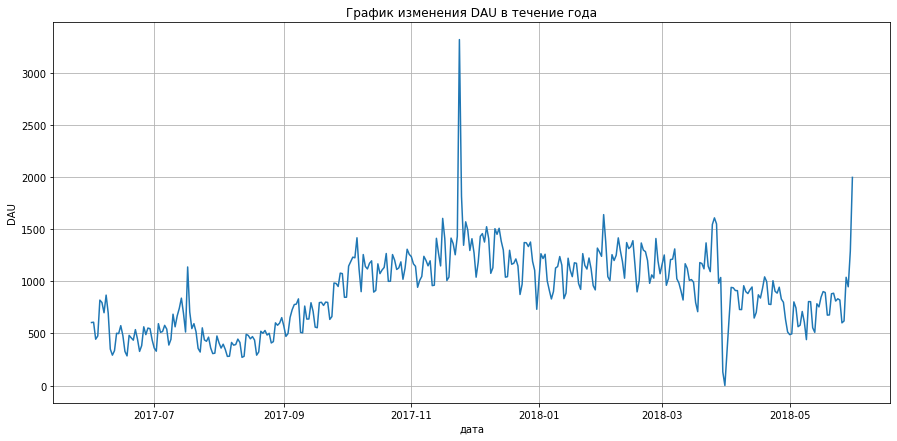

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=dau_total, x = 'date', y = 'uid')
ax.grid()
plt.title('График изменения DAU в течение года')
plt.xlabel('дата')
plt.ylabel('DAU');

#### DAU. В среднем 907 людей пользуются сервисом в день. В ноябре есть подъем активности пользоваелей, возможно было какое-то важное событие, на которое все хотели попасть или была проведена маркетинговая компания, по привлечению пользователей. В апреле 2018 мы видим одно падение активности до нуля, возможно в этот день сайт не работал.


#### WAU (Количество уникальных пользоватейлей в неделю)

Посчитаем среднее WAU за наш период:

In [23]:
wau_total_mean = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
int(wau_total_mean)

5716

Построим график изменения WAU в течение года:

In [24]:
visits['begin_of_week'] = pd.to_datetime(visits['start_ts'], unit='d') - pd.to_timedelta(visits['start_ts'].dt.dayofweek, unit='d')
visits['begin_of_week'] = visits['begin_of_week'].dt.date

In [25]:
wau_total_1 = visits.groupby('begin_of_week').agg({'uid': 'nunique'}).reset_index()
wau_total_1

,begin_of_week,uid
0,2017-05-29,2021
1,2017-06-05,4129
2,2017-06-12,2812
3,2017-06-19,2878
4,2017-06-26,3064
5,2017-07-03,3294
6,2017-07-10,4355
7,2017-07-17,3841
8,2017-07-24,2655
9,2017-07-31,2364


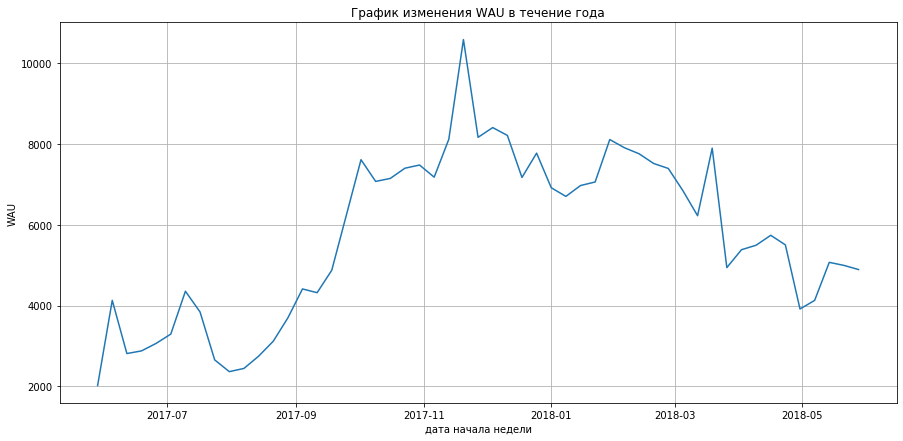

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=wau_total_1, x = 'begin_of_week', y = 'uid')
ax.grid()
plt.title('График изменения WAU в течение года')
plt.xlabel('дата начала недели')
plt.ylabel('WAU'); 

#### WAU. Среднее количество пользователей в неделю: 5716. По графику измения WAU в течение года мы видим подъем пользовательской активности с октября по апрель месяц. Есть пик использоапния в ноябре, который мы отмечали по DAU. Видимо при наступлении холодов, люди более активнее интересуются культурным досугом. В ноябре и декабре гтовят подарки к Новому году, отмечают культурно корпоративы. Летом же предпочитают природу и отдых на свежем воздухе загородом.


#### MAU (Количество уникальных пользоватейлей в месяц)

In [27]:
mau_total_mean = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
int(mau_total_mean)

23228

Построим график изменения MAU в течение года:

In [28]:
visits['begin_month'] = visits['start_ts'].values.astype('datetime64[M]')


In [29]:
mau_total = visits.groupby('begin_month').agg({'uid': 'nunique'}).reset_index()

In [30]:
mau_total

,begin_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


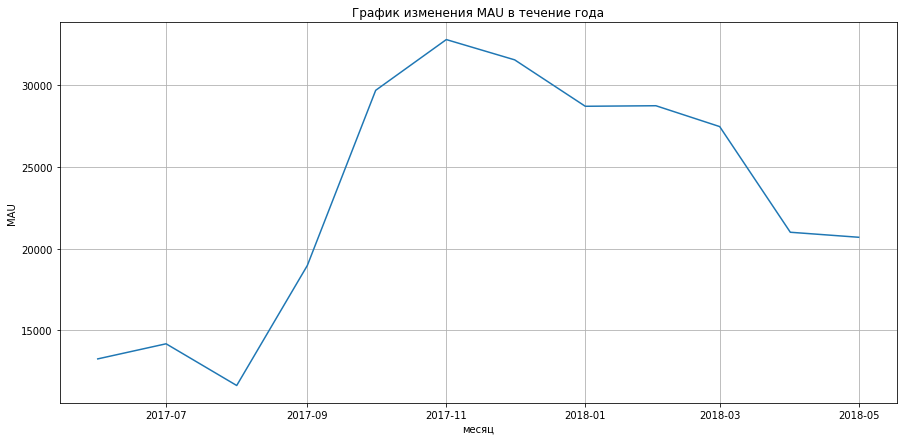

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=mau_total, x = 'begin_month', y = 'uid')
ax.grid()
plt.title('График изменения MAU в течение года')
plt.xlabel('месяц')
plt.ylabel('MAU'); 

#### MAU. Среднее количество пользователей в месяц 23228. Также на графике видим подъем активности пользователей в октябре по мартю Можем отметить что за год активност. Пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 7000-10000 пользователей в месяц.

#### Sticky factor (степень лояльности и вовлеченности аудитории)

In [32]:
sticky_factor_wau = dau_total_mean/wau_total_mean
sticky_factor_wau

uid    0.158844
dtype: float64

In [33]:
sticky_factor_mau = dau_total_mean/mau_total_mean
sticky_factor_mau

uid    0.03909
dtype: float64

#### 16% всех посетителей остаются лояльны к сервису целую неделю, 4% являются постоянными пользователями в течение месяца

#### Количество сессий в день

Посчитаем сколько сессий приходится на одного пользователя, за месяц

In [34]:
sessions_per_user = visits.groupby(['year', 'month']).agg({'uid': ['count','nunique']})
sessions_per_user

uid        
            count nunique
year month               
2017 6      16505   13259
     7      17828   14183
     8      14355   11631
     9      23907   18975
     10     37903   29692
     11     43969   32797
     12     41983   31557
2018 1      36939   28716
     2      37182   28749
     3      35679   27473
     4      26515   21008
     5      26635   20701

In [35]:
sessions_per_user.columns = ['n_sessions', 'n_users']

In [36]:
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [37]:
sessions_per_user['sessions_per_user'].mean()

1.2808894945992668

#### В среднем на одного человека приходится 1.28 сессии в месяц. то есть 1 из четырех человек заходит дважды в месяц, чтобы выбрать себе досуг, оставльные заходят 1 раз в месяц.

#### Средняя продолжительность сессии или ASL

In [38]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
asl = visits['session_duration_sec'].mean()
asl

643.506488592098

Средняя продолжительность сесиий 643 секунды. Посмотрим на самое частовстречающееся значение продолжительности сессии.

In [39]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

Самое частовстречающееся значение 60 секунд.

In [40]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Такое падение по среднему значению обусловлено очень большим максимальным значением.

Построим гистограмму распределения длительности сессий:

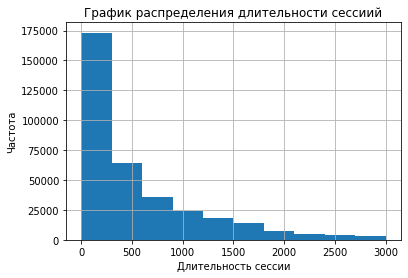

In [41]:
visits['session_duration_sec'].hist(range=[0, 3000])
ax.grid()
plt.title('График распределения длительности сессиий')
plt.xlabel('Длительность сессии')
plt.ylabel('Частота');

Построим распределения сессий по устройствам:

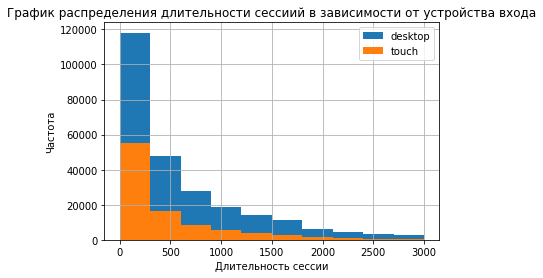

In [42]:
visits.groupby('device')['session_duration_sec'].hist(range=[0, 3000])
ax.grid()
plt.legend(('desktop','touch'))
plt.title('График распределения длительности сессиий в зависимости от устройства входа')
plt.xlabel('Длительность сессии')
plt.ylabel('Частота');

Распределения по устройствам аналогичны друг другу, посмотри средние значения и моду по устройствам:

In [43]:
visits.groupby('device')['session_duration_sec'].mean()

device
desktop    703.946977
touch      479.619407
Name: session_duration_sec, dtype: float64

In [44]:
visits.query('device == "touch"')['session_duration_sec'].mode()

0    60
dtype: int64

In [45]:
visits.query('device == "desktop"')['session_duration_sec'].mode()

0    60
dtype: int64

#### Средние значения и мода по устроиствам также аналогичны. Самое частое время на сайте 60 секунд и не зависят от устройства.

#### Retention rate

Для того, чтобы ответить на вопрос как часто люди возвращаются, проведем когортный анализ и посчитаем коэффициент удержания по когортам.

In [46]:
visits

,device,end_ts,source_id,start_ts,uid,date,week,month,year,weekday,begin_of_week,begin_month,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,2,2017-12-18,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,0,2018-02-19,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,5,2017-06-26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,6,2018-05-14,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,2,2017-12-25,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,5,2017-07-24,2017-07-01,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,3,2018-01-22,2018-01-01,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,5,2018-02-26,2018-03-01,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,3,2017-10-30,2017-11-01,19


In [47]:
first_visit_date_by_customers = visits.groupby('uid')['date'].min()
first_visit_date_by_customers

uid
11863502262781          2018-03-01
49537067089222          2018-02-06
297729379853735         2017-06-07
313578113262317         2017-09-18
325320750514679         2017-09-30
                           ...    
18446403737806311543    2017-11-30
18446424184725333426    2017-12-06
18446556406699109058    2018-01-01
18446621818809592527    2017-12-27
18446676030785672386    2017-10-04
Name: date, Length: 228169, dtype: object

In [48]:
first_visit_date_by_customers.name = 'first_visit_date'

In [49]:
visits = visits.join(first_visit_date_by_customers,on='uid')
visits

,device,end_ts,source_id,start_ts,uid,date,week,month,year,weekday,begin_of_week,begin_month,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,2,2017-12-18,2017-12-01,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,0,2018-02-19,2018-02-01,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,5,2017-06-26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,6,2018-05-14,2018-05-01,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,2,2017-12-25,2017-12-01,0,2017-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,5,2017-07-24,2017-07-01,19,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,3,2018-01-22,2018-01-01,19,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,5,2018-02-26,2018-03-01,19,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,3,2017-10-30,2017-11-01,19,2017-11-02


In [50]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month']= visits['start_ts'].astype('datetime64[M]')

In [51]:
visits.pivot_table(index='first_visit_month',
    columns='visit_month',
    values='uid',
    aggfunc='nunique') 

visit_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


Общая тенденция - уменьшение пользователей во времени. С октября по март количество новых пользователей возрастает на треть и пользователи в когортах возращаются немного чаще. 

In [52]:
visits_grouped_by_cogorts = visits.groupby(['first_visit_month', 'visit_month']).agg({'uid': 'nunique'}).reset_index()
visits_grouped_by_cogorts['cogort_lifetime'] = visits_grouped_by_cogorts['visit_month']-visits_grouped_by_cogorts['first_visit_month']
visits_grouped_by_cogorts['cogort_lifetime'] = visits_grouped_by_cogorts['cogort_lifetime'] / np.timedelta64(1,'M')
visits_grouped_by_cogorts['cogort_lifetime'] = visits_grouped_by_cogorts['cogort_lifetime'].round().astype('int')
visits_grouped_by_cogorts

,first_visit_month,visit_month,uid,cogort_lifetime
0,2017-06-01,2017-06-01,13259,0
1,2017-06-01,2017-07-01,1043,1
2,2017-06-01,2017-08-01,713,2
3,2017-06-01,2017-09-01,814,3
4,2017-06-01,2017-10-01,909,4
...,...,...,...,...
73,2018-03-01,2018-04-01,861,1
74,2018-03-01,2018-05-01,557,2
75,2018-04-01,2018-04-01,15709,0
76,2018-04-01,2018-05-01,760,1


In [53]:
visits_grouped_by_cogorts['first_visit_month'] = visits_grouped_by_cogorts['first_visit_month'].dt.strftime('%Y-%m') 

In [54]:
visits_grouped_by_cogorts_pivot = visits_grouped_by_cogorts.pivot_table(index='first_visit_month',
    columns='cogort_lifetime',
    values='uid',
    aggfunc='sum')
visits_grouped_by_cogorts_pivot

cogort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
initial_users_count = visits_grouped_by_cogorts[visits_grouped_by_cogorts['cogort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count

,first_visit_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [56]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
initial_users_count

,first_visit_month,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [57]:
visits_grouped_by_cogorts = visits_grouped_by_cogorts.merge(initial_users_count,on='first_visit_month')
visits_grouped_by_cogorts

,first_visit_month,visit_month,uid,cogort_lifetime,cohort_users
0,2017-06,2017-06-01,13259,0,13259
1,2017-06,2017-07-01,1043,1,13259
2,2017-06,2017-08-01,713,2,13259
3,2017-06,2017-09-01,814,3,13259
4,2017-06,2017-10-01,909,4,13259
...,...,...,...,...,...
73,2018-03,2018-04-01,861,1,20589
74,2018-03,2018-05-01,557,2,20589
75,2018-04,2018-04-01,15709,0,15709
76,2018-04,2018-05-01,760,1,15709


In [58]:
visits_grouped_by_cogorts['retention'] = visits_grouped_by_cogorts['uid']/visits_grouped_by_cogorts['cohort_users'] 
visits_grouped_by_cogorts

,first_visit_month,visit_month,uid,cogort_lifetime,cohort_users,retention
0,2017-06,2017-06-01,13259,0,13259,1.000000
1,2017-06,2017-07-01,1043,1,13259,0.078664
2,2017-06,2017-08-01,713,2,13259,0.053775
3,2017-06,2017-09-01,814,3,13259,0.061392
4,2017-06,2017-10-01,909,4,13259,0.068557
...,...,...,...,...,...,...
73,2018-03,2018-04-01,861,1,20589,0.041818
74,2018-03,2018-05-01,557,2,20589,0.027053
75,2018-04,2018-04-01,15709,0,15709,1.000000
76,2018-04,2018-05-01,760,1,15709,0.048380


In [59]:
retention_pivot = visits_grouped_by_cogorts.pivot_table(index='first_visit_month',columns='cogort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cogort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту для коэффициента удержания.


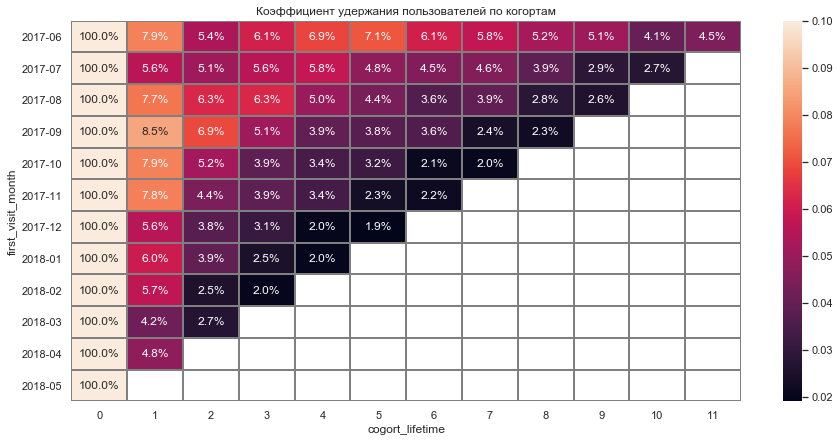

In [60]:
sns.set(style='white')
plt.figure(figsize=(15, 7))
plt.title('Коэффициент удержания пользователей по когортам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Retention первой когорты к концу расчетного года составляет 4.5%. Что больше чем у остальных когорт (2-2.5%). Самые лояльные пользователи в первой коготе, почему. У остальных когорт retention ниже, с течением времени даже на первый месяц возвращаемость пользователей падает. С течение жизни когорт retentiom падает везде.

### Вывод:

**DAU.** В среднем 907 людей пользуются сервисом в день. В ноябре есть подъем активности пользоваелей, возможно было какое-то важное событие, на которое все хотели попасть или была проведена маркетинговая компания, по привлечению пользователей. В апреле 2018 мы видим одно падение активности до нуля, возможно в этот день сайт не работал.

**WAU.** Среднее количество пользователей в неделю: 5716. По графику измения WAU в течение года мы видим подъем пользовательской активности с октября по апрель месяц. Есть пик использоапния в ноябре, который мы отмечали по DAU. Видимо при наступлении холодов, люди более активнее интересуются культурным досугом. В ноябре и декабре гтовят подарки к Новому году, отмечают культурно корпоративы. Летом же предпочитают природу и отдых на свежем воздухе загородом.

**MAU.** Среднее количество пользователей в месяц 23228. Также на графике видим подъем активности пользователей в октябре по мартю Можем отметить что за год активност. Пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 7000-10000 пользователей в месяц.

**Sticky factor.** 16% всех посетителей остаются лояльны к сервису целую неделю, 4% являются постоянными пользователями в течение месяца

**Количество сессий в день.**  В среднем на одного человека приходится 1.28 сессии в месяц. то есть 1 из четырех человек заходит дважды в месяц, чтобы выбрать себе досуг, оставльные заходят 1 раз в месяц.

**Средняя продолжительность сессии или ASL.** Средняя продолжительность сесиий 643 секунды.Но самое частовстречающееся значение продолжительности сессии 60 секунд. Такое падение по среднему значению обусловлено очень большим максимальным значением. Средние значения и мода по устроиствам также аналогичны. Самое частое время на сайте 60 секунд и не зависят от устройства.

**Retention Rate.** Retention первой когорты к концу расчетного года составляет 4.5%. Что больше чем у остальных когорт (2-2.5%). Самые лояльные пользователи в первой коготе, почему. У остальных когорт retention ниже, с течением времени даже на первый месяц возвращаемость пользователей падает. С течение жизни когорт retentiom падает везде.


### Продажи<a id="step6"></a>
1. Когда люди начинают покупать?
2. Сколько раз покупают за период?
3. Какой средний чек?
4. Сколько денег приносят? (LTV)

Для того, чтобы узнать когда люди начинают покупать, соединим таблицу orders c visits и выделим дату первого визита.

In [61]:
orders = orders.join(visits.sort_values(by='start_ts').groupby('uid').agg({'source_id': 'first', 'device': 'first', 'start_ts': 'min'}), on='uid', how='inner')

In [62]:
orders

,buy_ts,revenue,uid,source_id,device,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,touch,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,desktop,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,desktop,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,desktop,2017-10-23 12:32:00


In [63]:
orders['timedelta'] = orders['buy_ts'] - orders['start_ts']
orders['timedelta'] = orders['timedelta'].astype('timedelta64[m]')
orders['timedelta']

0             1.0
1            11.0
2             2.0
3            15.0
4            27.0
           ...   
50410       879.0
50411        45.0
50412         2.0
50413    317484.0
50414         3.0
Name: timedelta, Length: 50415, dtype: float64

In [64]:
orders['timedelta'].describe()

count     50415.000000
mean      53333.104790
std      101679.672887
min           0.000000
25%           6.000000
50%         206.000000
75%       55282.500000
max      524669.000000
Name: timedelta, dtype: float64

In [65]:
orders['timedelta'].mode()

0    1.0
dtype: float64

Построим гистограмму распределения времени заказа (времени прошедшего от первого визита на сервис до момента первого заказа)

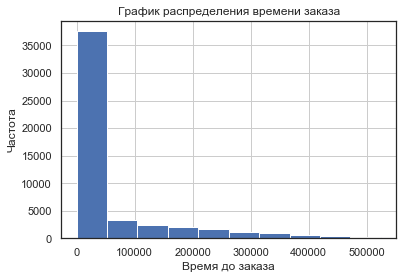

In [66]:
orders['timedelta'].hist()
ax.grid()
plt.title('График распределения времени заказа')
plt.xlabel('Время до заказа')
plt.ylabel('Частота');

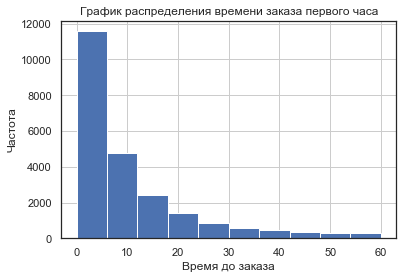

In [67]:
orders['timedelta'].hist(range=[0,60])
ax.grid()
plt.title('График распределения времени заказа первого часа')
plt.xlabel('Время до заказа')
plt.ylabel('Частота');

#### Время до первого заказа.  В большинстве своем люди заходят и совершают свой первый заказ в течение 1 минуты. То есть пользователь точно знает зачем он зашел в сервис. Мы видим также , что абсолюное большинство пользователей совершает свой заказ в первые 30 минут после захода най сайт, то есть человек зашел, изучил информацию и сделал свой выбор. Есть категория пользователей, которые от знакомства с сервисом до своей первой покупки ждали 69 дней.

### Покупательская активность пользователей

Посчитаем сколько покупок происходит в среднем день:

In [68]:
orders['buy_date'] = orders['buy_ts'].dt.date

In [69]:
orders_per_day = orders.groupby('buy_date')['uid'].count().reset_index()
orders_per_day.describe()

,uid
count,364.000000
mean,138.502747
std,76.858480
min,1.000000
25%,82.750000
50%,136.000000
75%,177.000000
max,814.000000


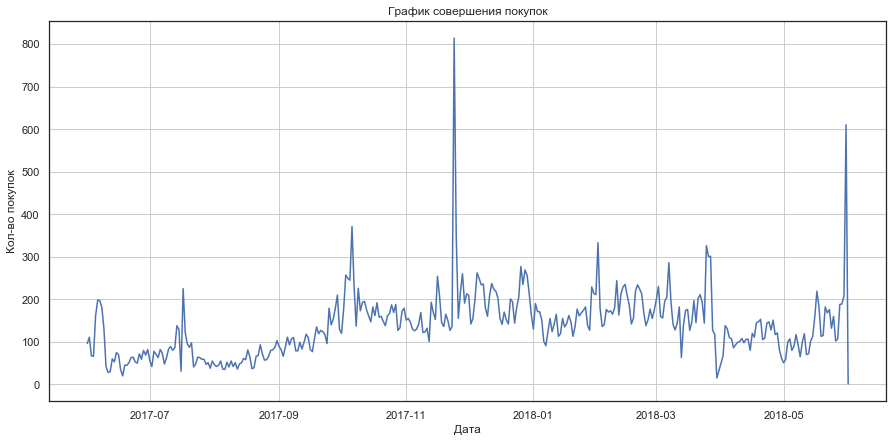

In [70]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=orders_per_day, x = 'buy_date', y = 'uid')
ax.grid()
plt.title('График совершения покупок')
plt.xlabel('Дата')
plt.ylabel('Кол-во покупок'); 

#### В среднем совершается 138 покупок в день. Ноябрь 2017 - пик покупательской активности, возможно был старт продаж на какое-то очень желаемое мероприятие. Так же мы видим пики в июне, июле, октябре, повышенная активность с декабря по апрель. пользователи не только активно посещают страницы Афиши в это время, но и активно покупают.в последний день мая мы также видим еще один пик.

Посмотрим активность покупателей по неделям.

In [71]:
orders['first_day_week'] = pd.to_datetime(orders['buy_ts'], unit='d') - pd.to_timedelta(orders['buy_ts'].dt.dayofweek, unit='d')
orders['first_day_week'] = orders['first_day_week'].dt.date

In [72]:
orders_per_week = orders.groupby('first_day_week')['uid'].count().reset_index()

In [73]:
orders_per_week.describe()

,uid
count,53.000000
mean,951.226415
std,396.439958
min,314.000000
25%,636.000000
50%,991.000000
75%,1257.000000
max,1894.000000


В среднем покупают 950 покупок в неделю. Построим график по недельным покупкам в течение года.

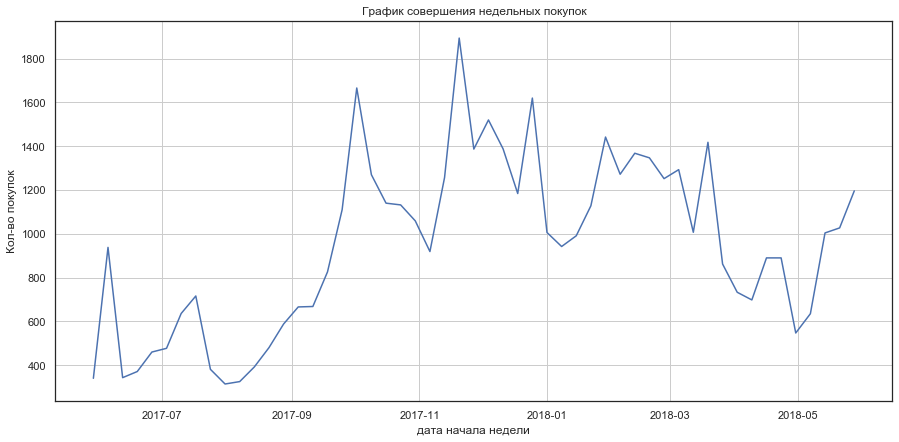

In [74]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=orders_per_week, x = 'first_day_week', y = 'uid')
ax.grid()
plt.title('График совершения недельных покупок')
plt.xlabel('дата начала недели')
plt.ylabel('Кол-во покупок'); 

#### В среднем покупают 950 покупок в неделю.  Пики активности покупателей аналогичны активностям по дням, а также MAU. В какие-то недели пользователи больше интересются билетами, в какие-то меньше. Перед праздниками активность существенно возрастает.

Посмотрим помесячную активность совершения покупок:

In [75]:
orders['first_day_month'] = orders['buy_ts'].values.astype('datetime64[M]')

In [76]:
orders_per_month = orders.groupby('first_day_month')['uid'].count().reset_index()

In [77]:
orders_per_month.describe()

,uid
count,13.000000
mean,3878.076923
std,1858.113401
min,1.000000
25%,2363.000000
50%,4346.000000
75%,5326.000000
max,6218.000000


В среднем покупают 3878 покупок в месяц. Построим график по недельным покупкам в течение года.

Постоим график месячной покупательской активности пользвателей:

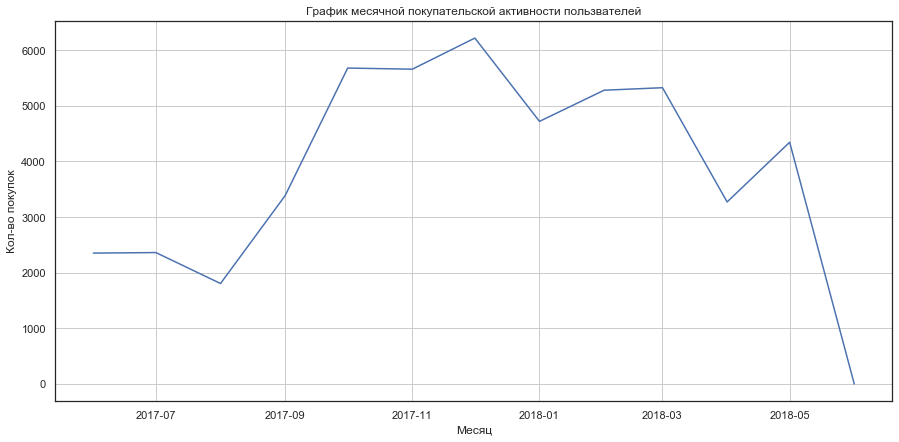

In [78]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=orders_per_month, x = 'first_day_month', y = 'uid')
ax.grid()
plt.title('График месячной покупательской активности пользвателей')
plt.xlabel('Месяц')
plt.ylabel('Кол-во покупок'); 

####  Среднее количество покупок в месяц 3878. Также на графике видим подъем активности пользователей в октябре по март. Можем отметить что за год активность пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 2000-3000 в месяц.

### Средний чек покупки

Посмотрим средний чек по когортам, как он ведет себя в той или иной когорте с течением времени. Проведем когортный анализ.

In [79]:
orders

,buy_ts,revenue,uid,source_id,device,start_ts,timedelta,buy_date,first_day_week,first_day_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00,1.0,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00,11.0,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00,2.0,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00,15.0,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00,27.0,2017-06-01,2017-05-29,2017-06-01
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,touch,2018-05-31 09:11:00,879.0,2018-05-31,2018-05-28,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,desktop,2018-05-31 23:05:00,45.0,2018-05-31,2018-05-28,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,desktop,2018-05-31 23:52:00,2.0,2018-05-31,2018-05-28,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,desktop,2017-10-23 12:32:00,317484.0,2018-05-31,2018-05-28,2018-05-01


In [80]:
orders['first_order_month'] = orders['start_ts'].astype('datetime64[M]')
orders_grouped_by_cohorts = orders.groupby(['first_order_month','first_day_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts

revenue   uid
first_order_month first_day_month                
2017-06-01        2017-06-01        9557.49  2023
                  2017-07-01        2664.58   231
                  2017-08-01        1464.69   129
                  2017-09-01        3882.09   188
                  2017-10-01        3940.59   257
...                                     ...   ...
2018-03-01        2018-05-01         774.77    90
2018-04-01        2018-04-01        8043.82  1763
                  2018-05-01        1838.73   174
2018-05-01        2018-05-01       10368.11  2315
                  2018-06-01           3.42     1

[79 rows x 2 columns]

Найдём средний чек покупателя revenue_per_user

In [81]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени:

In [82]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='first_day_month',values='revenue_per_user',aggfunc='mean') 

first_day_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,11.534978,11.354186,20.649415,15.333035,13.913695,18.465344,14.650387,13.476221,22.318205,19.333421,11.543772,NaN
2017-07-01,NaN,5.633137,7.846519,7.442282,6.382857,5.535882,6.000602,4.819672,6.017969,6.300174,8.208750,6.228800,NaN
2017-08-01,NaN,NaN,5.161267,6.393077,7.256159,8.087265,7.864466,7.011842,6.403289,14.491047,15.672453,6.477931,NaN
2017-09-01,NaN,NaN,NaN,5.475055,10.138301,8.757801,58.645674,11.607928,13.643214,6.906000,7.121449,4.500753,NaN
2017-10-01,NaN,NaN,NaN,NaN,4.882297,8.003845,4.544589,5.370812,5.270051,5.775085,4.990603,5.332520,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4.924573,4.797806,5.105894,7.483770,5.516119,6.492018,5.415504,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.828702,5.269788,22.213228,27.400107,16.753678,14.372016,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.007946,6.099063,6.655771,3.871899,5.860778,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.036687,7.062135,6.698889,8.500094,NaN


In [83]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['first_day_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts

,first_order_month,first_day_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0 days
1,2017-06-01,2017-07-01,2664.58,231,11.534978,30 days
2,2017-06-01,2017-08-01,1464.69,129,11.354186,61 days
3,2017-06-01,2017-09-01,3882.09,188,20.649415,92 days
4,2017-06-01,2017-10-01,3940.59,257,15.333035,122 days
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,774.77,90,8.608556,61 days
75,2018-04-01,2018-04-01,8043.82,1763,4.562575,0 days
76,2018-04-01,2018-05-01,1838.73,174,10.567414,30 days
77,2018-05-01,2018-05-01,10368.11,2315,4.478665,0 days


In [84]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

In [85]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [86]:
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 

In [87]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,11.534978,11.354186,20.649415,15.333035,13.913695,18.465344,14.650387,13.476221,22.318205,19.333421,11.543772
2017-07,5.633137,7.846519,7.442282,6.382857,5.535882,6.000602,4.819672,6.017969,6.300174,8.208750,6.228800,NaN
2017-08,5.161267,6.393077,7.256159,8.087265,7.864466,7.011842,6.403289,14.491047,15.672453,6.477931,NaN,NaN
2017-09,5.475055,10.138301,8.757801,58.645674,11.607928,13.643214,6.906000,7.121449,4.500753,NaN,NaN,NaN
2017-10,4.882297,8.003845,4.544589,5.370812,5.270051,5.775085,4.990603,5.332520,NaN,NaN,NaN,NaN
2017-11,4.924573,4.797806,5.105894,7.483770,5.516119,6.492018,5.415504,NaN,NaN,NaN,NaN,NaN
2017-12,4.828702,5.269788,22.213228,27.400107,16.753678,14.372016,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.007946,6.099063,6.655771,3.871899,5.860778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.036687,7.062135,6.698889,8.500094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


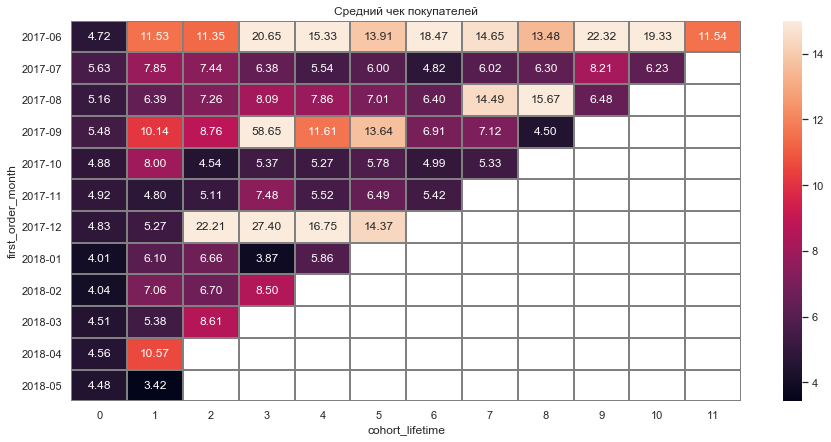

In [88]:
plt.figure(figsize=(15, 7))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=15) ;

#### Средний чек когорты июня 2017 сильно выделяется. Особенно это изменение проявляется с 3 месяца lifetime. Интересное поведение демонстрирует и когорта сентября 2017: там резко возрастает средний чек покупателей на третий месяц до 58 единиц. Возможно, это связано с очень дорогими заказами нескольких покупателей. Также выделяются средние чеки когорты декабря 2017, их чеки со второго по шестой месяцы достаточно высокие.

 ### LifeTime Value (пожизненная ценность пользователя)

In [89]:
#найдем первый месяц совершения первой покупки и добавим ее в покупки и добавим ее в orders
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders = orders.join(orders.groupby('uid').agg(first_month=('buy_ts', 'min')).astype('datetime64[M]'), on='uid')

In [90]:
# формируем когорты
ltv_cohorts = orders.groupby(['first_month', 'month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
ltv_cohorts['cohort_lifetime'] = ((ltv_cohorts['month'] - ltv_cohorts['first_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv_cohorts = ltv_cohorts.join(ltv_cohorts.query('cohort_lifetime == 0').groupby('first_month').agg(cohort_size=('uid', 'sum')), on='first_month')

In [91]:
# рассчитаем LTV как отношение валовой прибыли за месяц к размеру соответствующей когорты
margin_rate = 1
ltv_cohorts['ltv'] = ltv_cohorts['revenue'] * margin_rate / ltv_cohorts['cohort_size']
ltv_cohorts

,first_month,month,revenue,uid,cohort_lifetime,cohort_size,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,1,2023,0.485329
2,2017-06-01,2017-08-01,885.34,50,2,2023,0.437637
3,2017-06-01,2017-09-01,1931.30,54,3,2023,0.954671
4,2017-06-01,2017-10-01,2068.58,88,4,2023,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,2,3533,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,2276,4.657597
76,2018-04-01,2018-05-01,1209.92,69,1,2276,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,2988,4.660562


In [92]:
# построим сводную таблицу и посчитаем накопленную сумму
ltv_pivot = ltv_cohorts.pivot_table(index='first_month', columns='cohort_lifetime', values='ltv').cumsum(axis=1)
ltv_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


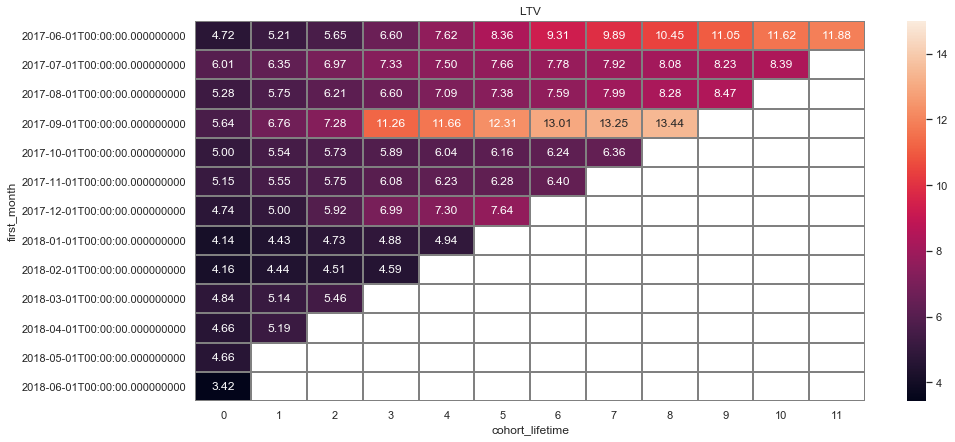

In [93]:
plt.figure(figsize=(15, 7))
plt.title('LTV')
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=15) ;

#### LTV — накопительная выручка когорты в пересчёте на количество людей. Особенно выделяется когорта польхователей сентября 2017 года и первая когорта (июнь 2017), ltv у нее немного выше остальных. У более старших когорт ltv накапливается медленнее, и в целом он ниже. Необходимо обратить на это внимание.

Вывод:

**Время до первого заказа.**  В большинстве своем люди заходят и совершают свой первый заказ в течение 1 минуты. То есть пользователь точно знает зачем он зашел в сервис. Мы видим также , что абсолюное большинство пользователей совершает свой заказ в первые 30 минут после захода най сайт, то есть человек зашел, изучил информацию и сделал свой выбор. Есть категория пользователей, которые от знакомства с сервисом до своей первой покупки ждали 69 дней.

**Покупательская активность пользователей.**
В среднем совершается 138 покупок в день. Ноябрь 2017 - пик покупательской активности, возможно был старт продаж на какое-то очень желаемое мероприятие. Так же мы видим пики в июне, июле, октябре, повышенная активность с декабря по апрель. пользователи не только активно посещают страницы Афиши в это время, но и активно покупают.в последний день мая мы также видим еще один пик.

В среднем покупают 950 покупок в день.  Пики активности покупателей аналогичны активностям по дням, а также MAU. В какие-то недели пользователи больше интересются билетами, в какие-то меньше. Перед праздниками активность существенно возрастает.

Среднее количество покупок в месяц 3878. Также на графике видим подъем активности пользователей в октябре по март. Можем отметить что за год активность пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 2000-3000 в месяц.

**Средний чек** когорты июня 2017 сильно выделяется. Особенно это изменение проявляется с 3 месяца lifetime. Интересное поведение демонстрирует и когорта сентября 2017: там резко возрастает средний чек покупателей на третий месяц до 58 единиц. Возможно, это связано с очень дорогими заказами нескольких покупателей. Также выделяются средние чеки когорты декабря 2017, их чеки со второго по шестой месяцы достаточно высокие.

**LTV*** — накопительная выручка когорты в пересчёте на количество людей. Особенно выделяется когорта польхователей сентября 2017 года и первая когорта (июнь 2017), ltv у нее немного выше остальных. У более старших когорт ltv накапливается медленнее, и в целом он ниже. Необходимо обратить на это внимание.



### Маркетинг<a id="step7"></a>
1. Сколько денег потратили? Всего / на каждый источник / по времени
2. Сколько стоило привлечение одного покупателя из каждого источника?
3. На сколько окупились расходы? (ROI)

In [94]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Всего потратили на рекламу:

In [95]:
costs['costs'].sum()

329131.62

Всего потратили по источникам:

In [96]:
costs_pct = costs.groupby('source_id')['costs'].sum().reset_index()
costs_pct['pct'] = costs_pct['costs'] / costs_pct['costs'].sum()*100
costs_pct

,source_id,costs,pct
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


Больше всего затрачено денег на источник 3 - 42% всех затрат. На 2,4,5 суммы примерно одинаковые 13 - 18% и совсем немного затрачено на 1,9,10 источники (до 6.3%)

Посчитаем суммы потраченные на рекламу в разрезе месяцев:

In [97]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [98]:
monthly_costs = costs.groupby('costs_month')['costs'].sum().reset_index()
monthly_costs

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Самые большие бюджеты на маркетинг выделены с октября по март включительно. Именно в этот же промежуток отмечается наибольшая активность и покупательская активность на сервисе. Именно тогда, когда пользователям нужен культурный досуг, мы активно привлекаем пользователей на сервис.

In [99]:
# сгруппируем данные по месяцу и источнику
monthly_source_costs = costs.groupby(['costs_month', 'source_id']).agg({'costs' : 'sum'}).reset_index()

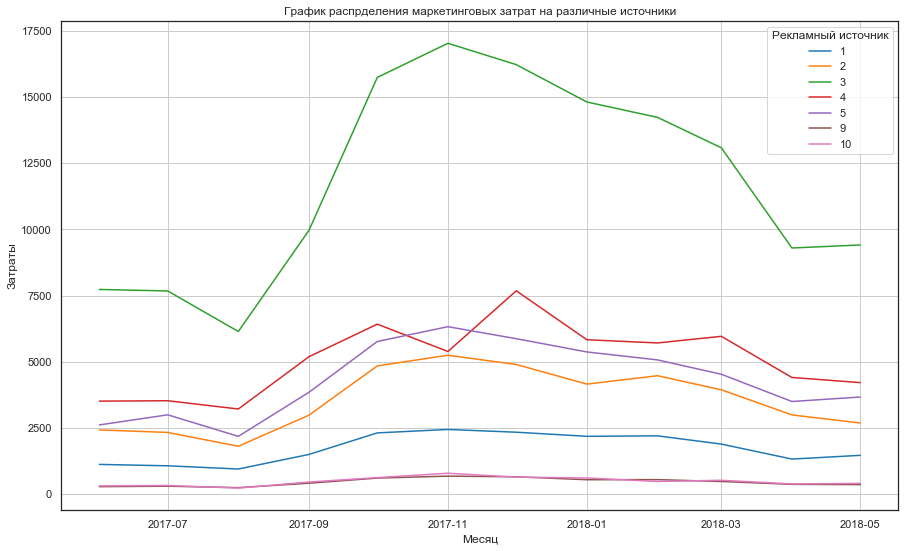

In [100]:
#Построим график распрделения маркетинговых затрат на различные источники
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=monthly_source_costs, x = 'costs_month', y = 'costs', hue='source_id', palette="tab10")
ax.grid()
plt.title('График распрделения маркетинговых затрат на различные источники')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.legend(('1', '2', '3', '4', '5', '9', '10'), title='Рекламный источник');

Как видно из графика, самые большие затраты шли на источник 3 и именно в период с сентября по март включительно, бюджет на остальные источники был немного увеличен с сентября по март, но не настолько внушительно.

### CAC. Посчитаем сколько стоило привлечение одного покупателя 

In [101]:
#Объединим таблицы с когортную таблицу с затратами на меркетинг и посчитаем 'cac' как затраты на рекламу поделенные на размеры когортю
ltv_cac = pd.merge(ltv_cohorts, monthly_costs, left_on='first_month', right_on='costs_month')
ltv_cac['cac'] = ltv_cac['costs'] / ltv_cac['cohort_size']
ltv_cac

,first_month,month,revenue,uid,cohort_lifetime,cohort_size,ltv,costs_month,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,0,2023,4.724414,2017-06-01,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,61,1,2023,0.485329,2017-06-01,18015.00,8.905091
2,2017-06-01,2017-08-01,885.34,50,2,2023,0.437637,2017-06-01,18015.00,8.905091
3,2017-06-01,2017-09-01,1931.30,54,3,2023,0.954671,2017-06-01,18015.00,8.905091
4,2017-06-01,2017-10-01,2068.58,88,4,2023,1.022531,2017-06-01,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,90,1,3533,0.300892,2018-03-01,30415.27,8.608907
74,2018-03-01,2018-05-01,1114.87,58,2,3533,0.315559,2018-03-01,30415.27,8.608907
75,2018-04-01,2018-04-01,10600.69,2276,0,2276,4.657597,2018-04-01,22289.38,9.793225
76,2018-04-01,2018-05-01,1209.92,69,1,2276,0.531599,2018-04-01,22289.38,9.793225


In [102]:
#сгруппируем данные по жизни когорты и посчитаем накопленный ltv
a = ltv_cac.groupby('cohort_lifetime')['ltv'].mean().reset_index()
a['accum_ltv'] = a['ltv'].cumsum()
a

,cohort_lifetime,ltv,accum_ltv
0,0,4.916823,4.916823
1,1,0.455547,5.372369
2,2,0.405498,5.777867
3,3,0.827223,6.605091
4,4,0.346141,6.951232
5,5,0.333492,7.284724
6,6,0.363777,7.648502
7,7,0.297408,7.945909
8,8,0.297666,8.243575
9,9,0.313637,8.557212


In [103]:
#сгруппируем данные по жихни когорты и посчитаем средний cac.
ltv_cac.groupby('cohort_lifetime')['cac'].mean().reset_index()

,cohort_lifetime,cac
0,0,9.147357
1,1,9.302768
2,2,9.253722
3,3,9.325368
4,4,9.370694
5,5,9.289750
6,6,9.381074
7,7,9.399515
8,8,9.657062
9,9,9.728864


In [104]:
ltv_cac['cac'].mean()

9.319905176921116

В среднем стоимость привлечения одного покупателя стоит 9.32 денежных единиц.

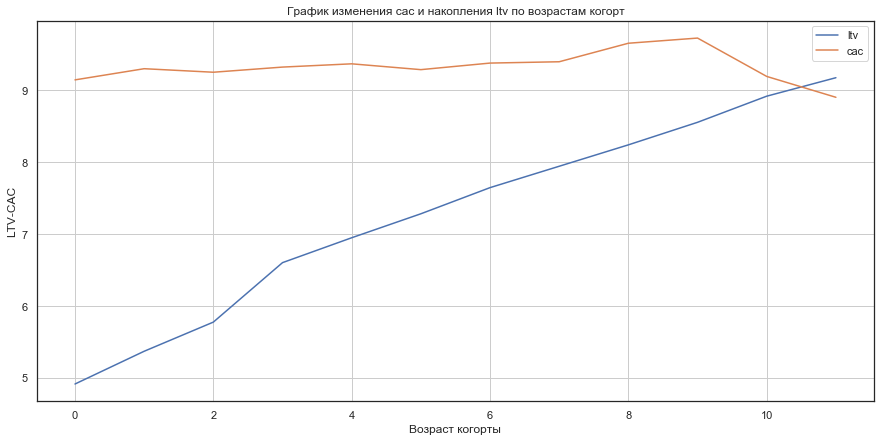

In [105]:
#построим график изменения cac и накопления ltv по возрастам когорт
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=a, x = 'cohort_lifetime', y = 'accum_ltv', label = 'ltv')
sns.lineplot(data=ltv_cac.groupby('cohort_lifetime')['cac'].mean().reset_index(), x = 'cohort_lifetime', y = 'cac', label = 'cac')
ax.grid()
plt.title('График изменения cac и накопления ltv по возрастам когорт')
plt.xlabel('Возраст когорты')
plt.ylabel('LTV-CAC');

Точка окупаемости согласно графикам находится на 10-м месяце.

### ROMI

In [106]:
# Рассчитаем ROMI по когортам: поделим LTV на CAC
ltv_cac['romi'] = ltv_cac['ltv'] / ltv_cac['cac']
romi_pivot  = ltv_cac.pivot_table(
        index='first_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')

romi_pivot.cumsum(axis=1).round(2) 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Посчитаем среднюю когорту для ROMI
romi_pivot.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорты окупаются на 10-м месяце жизни.

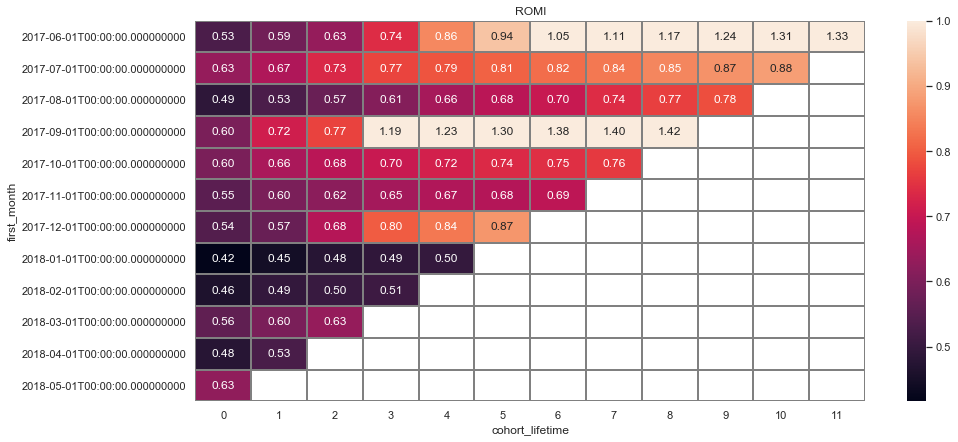

In [108]:
# построим тепловую карту для ROMI
plt.figure(figsize=(15, 7))
plt.title('ROMI')
sns.heatmap(romi_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=1) ;

По когортам возврат инвестиций мы видим только у июньской когорты 2017 на шестом месяце и у сентябрьской когорты 2017 года на третий месяц, именно тогда когда были сильно увеличены инвестиции в третий источник рекламы.У остальных  когорт ROMI=1 не достигнут.

#### Вывод:

**Маркетинговый бюджет.**
Всего потратили на рекламу за весь период 329 131.62 денежных единиц.
Больше всего затрачено денег на источник 3 - 42% всех затрат. На 2,4,5 суммы примерно одинаковые 13 - 18% и совсем немного затрачено на 1,9,10 источники (до 6.3%)
Самые большие бюджеты на маркетинг выделены с октября по март включительно. Именно в этот же промежуток отмечается наибольшая активность и покупательская активность на сервисе. Именно тогда, когда пользователям нужен культурный досуг, мы активно привлекаем пользователей на сервис.
Самые большие затраты шли на источник 3 и именно в период с сентября по март включительно, бюджет на остальные источники был немного увеличен с сентября по март, но не настолько внушительно.

**CAC.** В среднем стоимость привлечения одного покупателя стоит 9.32 денежных единиц.
Точка  окупаемости согласно графикам находится на 11-м месяце.

**ROMI.** По когортам возврат инвестиций есть только у июньской когорты 2017 на шестом месяце и у сентябрьской когорты 2017 года на третий месяц, именно на этой когорте были сильно увеличены инвестиции в третий источник рекламы.У остальных  когорт ROMI=1 не достигнут.


### Графики<a id="step8"></a>
1. Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

Построим визуализации метрик в срезах по устройствам:

#### DAU Device

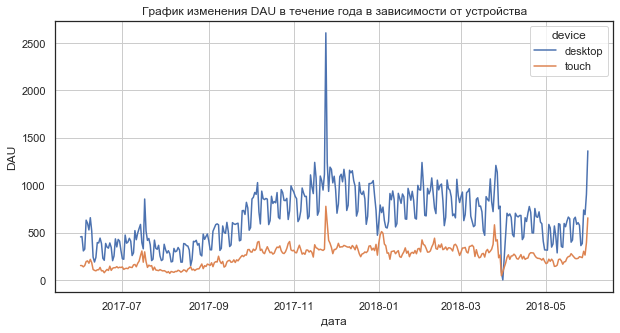

In [109]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=visits.groupby(['device', 'date']).agg({'uid': 'nunique'}).reset_index(), x = 'date', y = 'uid', hue = 'device')
ax.grid()
plt.title('График изменения DAU в течение года в зависимости от устройства')
plt.xlabel('дата')
plt.ylabel('DAU');

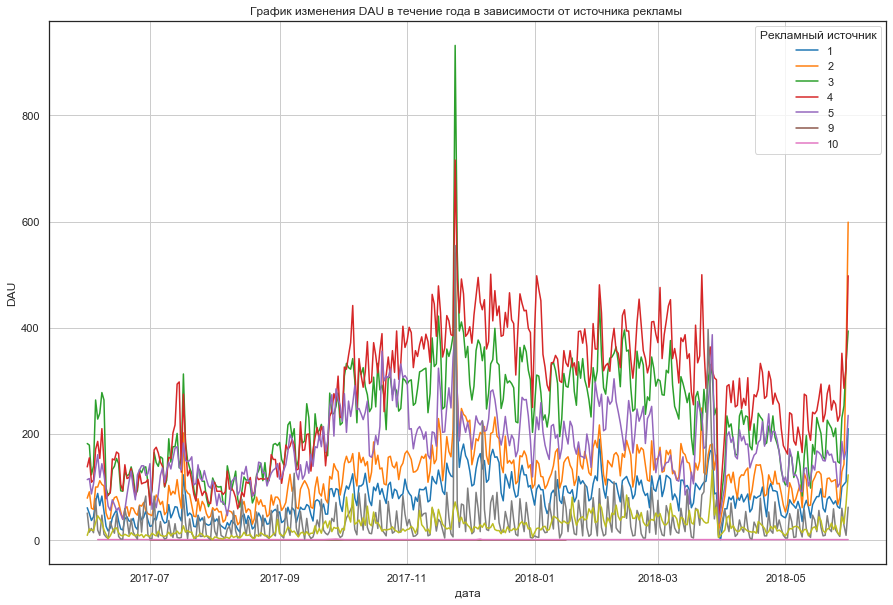

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=visits.groupby(['source_id', 'date']).agg({'uid': 'nunique'}).reset_index(), x = 'date', y = 'uid', hue = 'source_id', palette='tab10')
ax.grid()
plt.title('График изменения DAU в течение года в зависимости от источника рекламы ')
plt.xlabel('дата')
plt.ylabel('DAU')
plt.legend(('1', '2', '3', '4', '5', '9', '10'), title='Рекламный источник');

In [111]:
costs_pct

,source_id,costs,pct
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


#### WAU Device

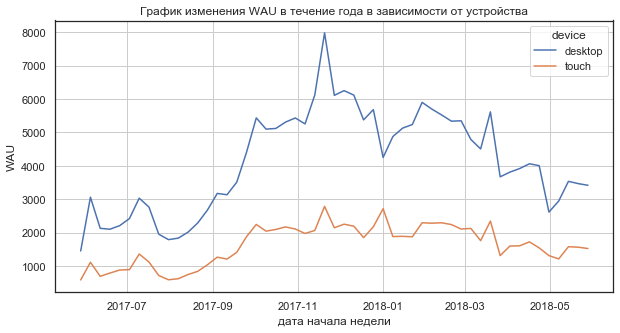

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=visits.groupby(['device', 'begin_of_week']).agg({'uid': 'nunique'}).reset_index(), x = 'begin_of_week', y = 'uid', hue='device')
ax.grid()
plt.title('График изменения WAU в течение года в зависимости от устройства')
plt.xlabel('дата начала недели')
plt.ylabel('WAU'); 

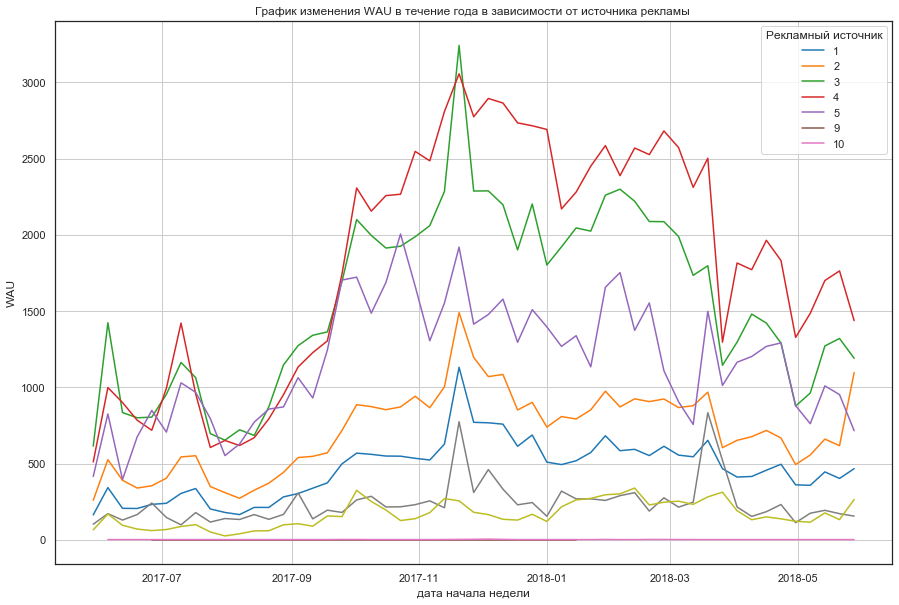

In [113]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=visits.groupby(['source_id', 'begin_of_week']).agg({'uid': 'nunique'}).reset_index(), x = 'begin_of_week', y = 'uid', hue='source_id', palette='tab10')
ax.grid()
plt.title('График изменения WAU в течение года в зависимости от источника рекламы ')
plt.xlabel('дата начала недели')
plt.ylabel('WAU')
plt.legend(('1', '2', '3', '4', '5', '9', '10'), title='Рекламный источник'); 

#### MAU Device

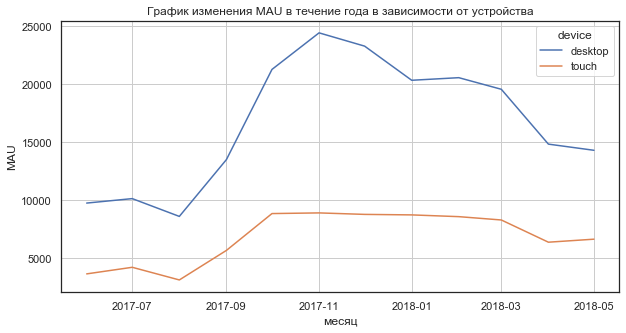

In [114]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=visits.groupby(['device', 'begin_month']).agg({'uid': 'nunique'}).reset_index(), x = 'begin_month', y = 'uid', hue='device')
ax.grid()
plt.title('График изменения MAU в течение года в зависимости от устройства')
plt.xlabel('месяц')
plt.ylabel('MAU'); 

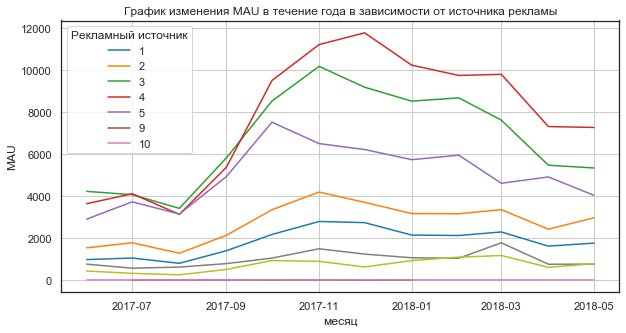

In [115]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=visits.groupby(['source_id', 'begin_month']).agg({'uid': 'nunique'}).reset_index(), x = 'begin_month', y = 'uid', hue='source_id',  palette='tab10')
ax.grid()
plt.title('График изменения MAU в течение года в зависимости от источника рекламы')
plt.xlabel('месяц')
plt.ylabel('MAU')
plt.legend(('1', '2', '3', '4', '5', '9', '10'), title='Рекламный источник');

In [116]:
costs_pct.sort_values('pct')

,source_id,costs,pct
5,9,5517.49,1.676378
6,10,5822.49,1.769046
0,1,20833.27,6.329769
1,2,42806.04,13.005751
4,5,51757.10,15.725350
3,4,61073.60,18.555981
2,3,141321.63,42.937725


**По устройствам:**

Согласно графикам, можно утверждать что мобильными версиями сервиса пользуются одна треть всех пользователей. Пики событий немного более выражены на десктопных версиях, видимо события влияющие на пики, задействуют больше пользователей десктопов.

**По рекламным источникам:**

- График DAU не читабелен
- WAU можем отметить что в ноябре было пиковое количество прихода пользоватедей по источнику 3. На который было потрачено 42% бюджета. Именно тогда проводилась активная кампания по источнику 3.
- MAU. На этом графике хорошо видно, что наибольшую конверсию пользователей дает источник 4 (42% бюджета), а не источник 3(18%), что было бы логично. В остальном количество пользователей пропорциональны затраченному бюджету.


#### Длительность сессий.

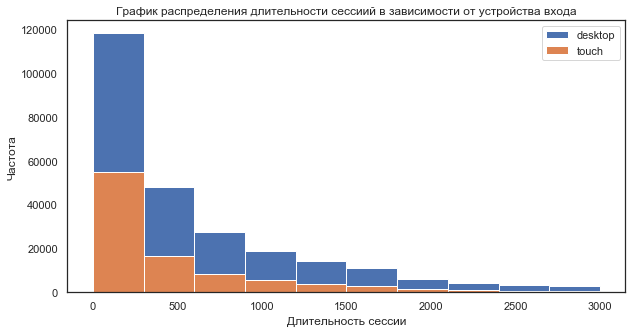

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
visits.groupby('device')['session_duration_sec'].hist(range=[0, 3000])
ax.grid()
plt.legend(('desktop','touch'))
plt.title('График распределения длительности сессиий в зависимости от устройства входа')
plt.xlabel('Длительность сессии')
plt.ylabel('Частота');

Средние значения и мода по устроиствам также аналогичны. Самое частое время на сайте 60 секунд и не зависят от устройства.

#### LTV в срезе по источникам.

In [118]:
orders

,buy_ts,revenue,uid,source_id,device,start_ts,timedelta,buy_date,first_day_week,first_day_month,first_order_month,month,first_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00,1.0,2017-06-01,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00,11.0,2017-06-01,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00,2.0,2017-06-01,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00,15.0,2017-06-01,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00,27.0,2017-06-01,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,touch,2018-05-31 09:11:00,879.0,2018-05-31,2018-05-28,2018-05-01,2018-05-01,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,desktop,2018-05-31 23:05:00,45.0,2018-05-31,2018-05-28,2018-05-01,2018-05-01,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,desktop,2018-05-31 23:52:00,2.0,2018-05-31,2018-05-28,2018-05-01,2018-05-01,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,desktop,2017-10-23 12:32:00,317484.0,2018-05-31,2018-05-28,2018-05-01,2017-10-01,2018-05-01,2018-05-01


In [119]:
#сгруппируем таблицу с заказами по пользователям и посчитаем дату первого заказа
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
payers

,uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [120]:
# добавим в таблицу з заказами столбец с датой первого заказа
ltv = payers.merge(orders, on = 'uid')
# посчитаем премя жизни от первого заказа
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1, 'M')).round().astype(int)
ltv

,uid,first_buy,buy_ts,revenue,source_id,device,start_ts,timedelta,buy_date,first_day_week,first_day_month,first_order_month,month,first_month,lifetime
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55,2,desktop,2017-09-18 22:49:00,154022.0,2018-01-03,2018-01-01,2018-01-01,2017-09-01,2018-01-01,2018-01-01,0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,10,touch,2017-06-03 10:13:00,0.0,2017-06-03,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,10,touch,2017-06-03 10:13:00,446.0,2017-06-03,2017-05-29,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33,3,desktop,2017-10-11 17:14:00,79.0,2017-10-11,2017-10-09,2017-10-01,2017-10-01,2017-10-01,2017-10-01,0
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44,5,desktop,2018-01-27 20:10:00,1184.0,2018-01-28,2018-01-22,2018-01-01,2018-01-01,2018-01-01,2018-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:55:00,2017-09-24 23:48:00,0.24,3,desktop,2017-09-22 23:48:00,2880.0,2017-09-24,2017-09-18,2017-09-01,2017-09-01,2017-09-01,2017-09-01,0
50411,18445407535914413204,2017-09-22 23:55:00,2017-09-25 15:56:00,0.12,3,desktop,2017-09-22 23:48:00,3848.0,2017-09-25,2017-09-25,2017-09-01,2017-09-01,2017-09-01,2017-09-01,0
50412,18445601152732270159,2018-03-26 22:54:00,2018-03-26 22:54:00,4.22,2,desktop,2017-08-07 11:51:00,333303.0,2018-03-26,2018-03-26,2018-03-01,2017-08-01,2018-03-01,2018-03-01,0
50413,18446156210226471712,2018-02-18 19:34:00,2018-02-18 19:34:00,9.78,3,desktop,2017-11-07 10:01:00,148893.0,2018-02-18,2018-02-12,2018-02-01,2017-11-01,2018-02-01,2018-02-01,0


In [121]:
#строим сводную таблицу по источникам возрасту когорт и количеству заказов
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
orders_lifetime

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,3498.0,284.0,247.0,242.0,189.0,140.0,185.0,137.0,109.0,86.0,62.0,34.0,10.0
2,4380.0,621.0,398.0,283.0,177.0,149.0,105.0,75.0,100.0,41.0,40.0,16.0,7.0
3,11708.0,493.0,331.0,214.0,157.0,111.0,105.0,72.0,48.0,16.0,15.0,8.0,11.0
4,11550.0,341.0,236.0,188.0,167.0,120.0,122.0,63.0,46.0,30.0,18.0,8.0,6.0
5,7956.0,283.0,245.0,196.0,153.0,145.0,142.0,119.0,80.0,60.0,16.0,9.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1272.0,81.0,59.0,69.0,46.0,39.0,34.0,16.0,19.0,9.0,3.0,0.0,0.0
10,1469.0,29.0,13.0,23.0,7.0,2.0,7.0,6.0,4.0,2.0,0.0,0.0,0.0


In [122]:
#строим сводную таблицу по источникам возрасту когорт и количеству уникальных пользователей
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
buyers_lifetime

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,2899.0,110.0,92.0,59.0,57.0,39.0,45.0,33.0,23.0,14.0,15.0,10.0,6.0
2,3506.0,159.0,132.0,99.0,88.0,75.0,55.0,36.0,29.0,17.0,18.0,9.0,5.0
3,10473.0,286.0,227.0,149.0,111.0,86.0,87.0,59.0,45.0,14.0,15.0,8.0,8.0
4,10296.0,272.0,189.0,153.0,110.0,85.0,79.0,40.0,37.0,23.0,12.0,7.0,5.0
5,6931.0,175.0,124.0,79.0,79.0,59.0,47.0,34.0,25.0,19.0,7.0,6.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1088.0,68.0,52.0,45.0,37.0,27.0,23.0,11.0,13.0,8.0,3.0,0.0,0.0
10,1329.0,26.0,12.0,19.0,6.0,2.0,7.0,5.0,4.0,1.0,0.0,0.0,0.0


In [123]:
#строим сводную таблицу по источникам возрасту когорт и суммам выручки
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,17846.78,2883.49,2146.19,1874.49,1425.00,642.94,796.48,988.65,940.43,752.60,309.32,336.13,148.05
2,23737.70,4502.22,5831.11,5384.22,2266.59,2048.43,831.02,795.73,781.76,218.08,397.70,117.20,11.85
3,46894.89,2634.89,1429.20,1491.36,784.89,413.65,255.68,279.28,195.68,53.66,54.69,11.88,11.49
4,47204.71,1579.06,1175.28,991.91,1232.90,1628.83,1192.28,501.02,198.87,390.26,559.93,28.34,13.44
5,34030.40,1416.06,2465.93,9473.11,1635.71,1203.14,823.87,622.37,416.77,423.77,44.88,66.24,1.77
7,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,4222.42,311.70,261.81,294.70,118.92,160.37,134.41,73.42,128.19,44.11,9.35,0.00,0.00
10,4205.13,84.13,36.23,63.61,18.63,3.51,17.95,14.12,3.66,3.36,0.00,0.00,0.00


In [124]:
##строим сводную таблицу по источникам возрасту когорт и ltv когорт
ltv = ltv.cumsum(axis = 1)
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,17846.78,20730.27,22876.46,24750.95,26175.95,26818.89,27615.37,28604.02,29544.45,30297.05,30606.37,30942.50,31090.55
2,23737.70,28239.92,34071.03,39455.25,41721.84,43770.27,44601.29,45397.02,46178.78,46396.86,46794.56,46911.76,46923.61
3,46894.89,49529.78,50958.98,52450.34,53235.23,53648.88,53904.56,54183.84,54379.52,54433.18,54487.87,54499.75,54511.24
4,47204.71,48783.77,49959.05,50950.96,52183.86,53812.69,55004.97,55505.99,55704.86,56095.12,56655.05,56683.39,56696.83
5,34030.40,35446.46,37912.39,47385.50,49021.21,50224.35,51048.22,51670.59,52087.36,52511.13,52556.01,52622.25,52624.02
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,4222.42,4534.12,4795.93,5090.63,5209.55,5369.92,5504.33,5577.75,5705.94,5750.05,5759.40,5759.40,5759.40
10,4205.13,4289.26,4325.49,4389.10,4407.73,4411.24,4429.19,4443.31,4446.97,4450.33,4450.33,4450.33,4450.33


In [125]:
# добавляем размеры когорт (источники) и делим на них, получаем ltv на 1 пользователя
cohort_sizes = orders.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
ltv

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.584762,4.738128,4.852278,4.948617,5.068362,5.226563,5.342363,5.391025,5.410340,5.448244,5.502627,5.505380,5.506685
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631


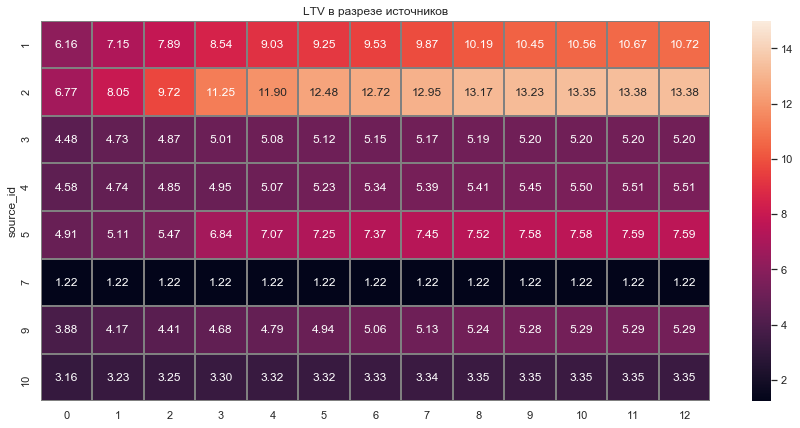

In [126]:
# построим тепловую карту для LTV
plt.figure(figsize=(15, 7))
plt.title('LTV в разрезе источников')
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=15);

Наибольший ltv у источника 2, также хорошие показатели у источника 1 и 5. у Источника 3,4,9 средние значения. источник 7 совсем не меняется в динамике.

#### CAC в разрезе источников

In [127]:
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_sizes.reset_index(), on = 'source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('source_id')
cac

,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


Наименьшие затраты на привлечение одного покупателя у 10-го источника, также небольшие у 9 и 4. Самые дорогие - 2,3.

#### ROMI в разрезе источников

In [128]:
#Посчитаем когда окупились расходы (ROMI)
romi = ltv.merge(cac[['cac']], on = 'source_id')
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')
romi

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.856648,0.995056,1.098073,1.188049,1.256449,1.287311,1.325542,1.372997,1.418138,1.454263,1.469110,1.485245,1.492351
2,0.554541,0.659718,0.795940,0.921722,0.974672,1.022526,1.041939,1.060528,1.078791,1.083886,1.093177,1.095915,1.096191
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.772915,0.798770,0.818014,0.834255,0.854442,0.881112,0.900634,0.908838,0.912094,0.918484,0.927652,0.928116,0.928336
5,0.657502,0.684862,0.732506,0.915536,0.947140,0.970386,0.986304,0.998329,1.006381,1.014569,1.015436,1.016716,1.016750
9,0.765279,0.821772,0.869223,0.922635,0.944188,0.973254,0.997615,1.010922,1.034155,1.042150,1.043844,1.043844,1.043844
10,0.722222,0.736671,0.742894,0.753818,0.757018,0.757621,0.760704,0.763129,0.763757,0.764335,0.764335,0.764335,0.764335


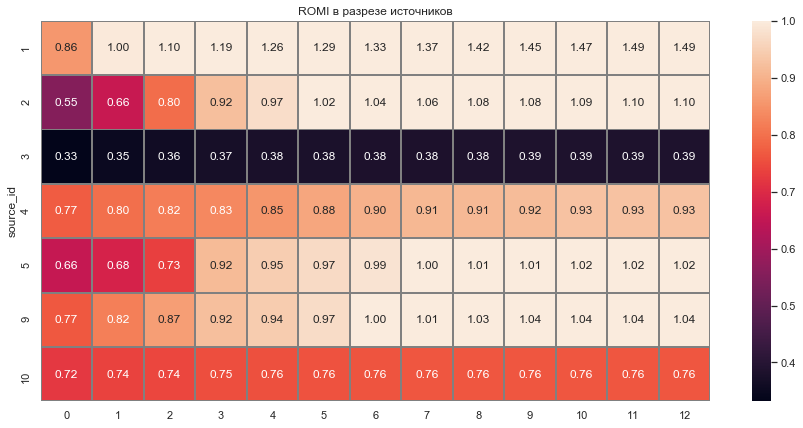

In [129]:
# построим тепловую карту для ROMI
plt.figure(figsize=(15, 7))
plt.title('ROMI в разрезе источников')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=1);

**ROMI по источникам**

Проанализируем значения метрик в срезе по устройствам:
- 1-й источник - с точки зрения окупаемости инвестиций самые привлекательный источник, у него затраты на маркетинг в первый же месяц окупаются, и имеет высокий ltv. Средний САС. В разрезе MAU он имеет неплохие показатели, стоит часть бюджета тратить именно сюда.
- 2-й источник: срок окупаемости на пятый месяц, и имеет самый высокий ltv .В разрезе MAU он имеет хорошие показатели, стоит часть бюджета перенаправить на 2-й источник.
- 9-й источник окупается на 6-й месяц. показатель ltv невысокий, mau тоже. рекомендуется оставить все как есть
- 5-й источник окупается на седьмой месяц. показатель ltv высокий. mau высокий, часть бюджета стоит направить на этот источник.
- 4-й источник почти окупился к концу года, но будет окупаться еще полгода при тойже динамике. Имеет невысокий ltv. Но при этом самый высокий MAU. Возможно стоит снизить немного эти бюджеты
- 10-й источник, не окупился к концу года. но имеет самый низкий сас. имеет самый низкий LTV. самый низкий MAU. Возможно стоит отказаться от этого источника.
- 3-й источник - не окупился, но имеет высокий MAU. У него самый высокий сас и низкий ltv. Стоит значительно уменьшить инвестиции в этот источник.

С точки зрения окупаемости инвестиций а также метрик ltv cac mau стоит перенаправить часть бюджета с 3,4 на 1,2,5
бюджет на 9-й оставить в том же объеме, отказаться от 10-го источника

## Общий вывод<a id="step9"></a>


**Подготовка данных:**

1. В таблице visits оптимизировны названия и столбцы start_ts и end_ts (время начала и окончания сессии) приведены к типу datetime
2. В таблице orders оптимизированы названия и столбец с buy_ts (дата и время заказа) приведен к типу datetime
3. В таблице costs столбец dt (дата затраты на рекламу) приведен к типу datetime

**Продукт.**

**DAU.** В среднем 907 людей пользуются сервисом в день. В ноябре есть подъем активности пользоваелей, возможно было какое-то важное событие, на которое все хотели попасть или была проведена маркетинговая компания, по привлечению пользователей. В апреле 2018 мы видим одно падение активности до нуля, возможно в этот день сайт не работал.

**WAU.** Среднее количество пользователей в неделю: 5716. По графику измения WAU в течение года мы видим подъем пользовательской активности с октября по апрель месяц. Есть пик использоапния в ноябре, который мы отмечали по DAU. Видимо при наступлении холодов, люди более активнее интересуются культурным досугом. В ноябре и декабре гтовят подарки к Новому году, отмечают культурно корпоративы. Летом же предпочитают природу и отдых на свежем воздухе загородом.

**MAU.** Среднее количество пользователей в месяц 23228. Также на графике видим подъем активности пользователей в октябре по мартю Можем отметить что за год активност. Пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 7000-10000 пользователей в месяц.

**Sticky factor.** 16% всех посетителей остаются лояльны к сервису целую неделю, 4% являются постоянными пользователями в течение месяца

**Количество сессий в день.**  В среднем на одного человека приходится 1.28 сессии в месяц. то есть 1 из четырех человек заходит дважды в месяц, чтобы выбрать себе досуг, оставльные заходят 1 раз в месяц.

**Средняя продолжительность сессии или ASL.** Средняя продолжительность сесиий 643 секунды.Но самое частовстречающееся значение продолжительности сессии 60 секунд. Такое падение по среднему значению обусловлено очень большим максимальным значением. Средние значения и мода по устроиствам также аналогичны. Самое частое время на сайте 60 секунд и не зависят от устройства.

**Retention Rate.** Retention первой когорты к концу расчетного года составляет 4.5%. Что больше чем у остальных когорт (2-2.5%). Самые лояльные пользователи в первой коготе, почему. У остальных когорт retention ниже, с течением времени даже на первый месяц возвращаемость пользователей падает. С течение жизни когорт retentiom падает везде.

**Продажи.**

**Время до первого заказа.**  В большинстве своем люди заходят и совершают свой первый заказ в течение 1 минуты. То есть пользователь точно знает зачем он зашел в сервис. Мы видим также , что абсолюное большинство пользователей совершает свой заказ в первые 30 минут после захода най сайт, то есть человек зашел, изучил информацию и сделал свой выбор. Есть категория пользователей, которые от знакомства с сервисом до своей первой покупки ждали 69 дней.

**Покупательская активность пользователей**
- В среднем совершается 138 покупок в день. Ноябрь 2017 - пик покупательской активности, возможно был старт продаж на какое-то очень желаемое мероприятие. Так же мы видим пики в июне, июле, октябре, повышенная активность с декабря по апрель. пользователи не только активно посещают страницы Афиши в это время, но и активно покупают.в последний день мая мы также видим еще один пик.

- В среднем покупают 950 покупок в день.  Пики активности покупателей аналогичны активностям по дням, а также MAU. В какие-то недели пользователи больше интересются билетами, в какие-то меньше. Перед праздниками активность существенно возрастает.

- Среднее количество покупок в месяц 3878. Также на графике видим подъем активности пользователей в октябре по март. Можем отметить что за год активность пользования сервисом возросла по среднему показателю за месяц на одну треть, примерно на 2000-3000 в месяц.

**Средний чек** когорты июня 2017 сильно выделяется. Особенно это изменение проявляется с 3 месяца lifetime. Интересное поведение демонстрирует и когорта сентября 2017: там резко возрастает средний чек покупателей на третий месяц до 58 единиц. Возможно, это связано с очень дорогими заказами нескольких покупателей. Также выделяются средние чеки когорты декабря 2017, их чеки со второго по шестой месяцы достаточно высокие.

**LTV** — накопительная выручка когорты в пересчёте на количество людей. Особенно выделяется когорта польхователей сентября 2017 года и первая когорта (июнь 2017), ltv у нее немного выше остальных. У более старших когорт ltv накапливается медленнее, и в целом он ниже. Необходимо обратить на это внимание.


**Маркетинг**

**Маркетинговый бюджет.**

Всего потратили на рекламу за весь период 329 131.62 денежных единиц.

Больше всего затрачено денег на источник 3 - 42% всех затрат. На 2,4,5 суммы примерно одинаковые 13 - 18% и совсем немного затрачено на 1,9,10 источники (до 6.3%)

Самые большие бюджеты на маркетинг выделены с октября по март включительно. Именно в этот же промежуток отмечается наибольшая активность и покупательская активность на сервисе. Именно тогда, когда пользователям нужен культурный досуг, мы активно привлекаем пользователей на сервис.

Самые большие затраты шли на источник 3 и именно в период с сентября по март включительно, бюджет на остальные источники был немного увеличен с сентября по март, но не настолько внушительно.

**CAC.** В среднем стоимость привлечения одного покупателя стоит 9.32 денежных единиц.
Точка средней окупаемости согласно графикам находится на 11-м месяце.

**ROMI.** По когортам возврат инвестиций есть только у июньской когорты 2017 на шестом месяце и у сентябрьской когорты 2017 года на третий месяц, именно на этой когорте были сильно увеличены инвестиции в третий источник рекламы.У остальных  когорт ROMI=1 не достигнут.

**Метрики в разрезе устройств.**

**MAU, WAU, DAU.** Согласно графикам, можно утверждать что мобильными версиями сервиса пользуются одна треть всех пользователей. Пики событий немного более выражены на десктопных версиях, видимо события влияющие на пики, задействуют юольше пользователей десктопов.

**По устройствам:**

Согласно графикам, можно утверждать что мобильными версиями сервиса пользуются одна треть всех пользователей. Пики событий немного более выражены на десктопных версиях, видимо события влияющие на пики, задействуют больше пользователей десктопов.

**По рекламным источникам:**

- График DAU не читабелен
- WAU можем отметить что в ноябре было пиковое количество прихода пользоватедей по источнику 3. На который было потрачено 42% бюджета. Именно тогда проводилась активная кампания по источнику 3.
- MAU. На этом графике хорошо видно, что наибольшую конверсию пользователей дает источник 4 (42% бюджета), а не источник 3(18%), что было бы логично. В остальном количество пользователей пропорциональны затраченному бюджету.

**Длительность сессий.** Средние значения и мода по устроиствам также аналогичны. Самое частое время на сайте 60 секунд и не зависят от устройства.

**LTV** Наибольший ltv у источника 2, также хорошие показатели у источника 1 и 5. у Источника 3,4,9 средние значения. источник 7 совсем не меняется в динамике.

**CAC.** Наименьшие затраты на привлечение одного покупателя у 10-го источника, также небольшие у 9 и 4. Самые дорогие - 2,3.

**ROMI по источникам**

Проанализируем значения метрик в срезе по устройствам:

- 1-й источник - с точки зрения окупаемости инвестиций самые привлекательный источник, у него затраты на маркетинг в первый же месяц окупаются, и имеет высокий ltv. Средний САС. В разрезе MAU он имеет неплохие показатели, стоит часть бюджета тратить именно сюда.
- 2-й источник: срок окупаемости на пятый месяц, и имеет самый высокий ltv .В разрезе MAU он имеет хорошие показатели, стоит часть бюджета перенаправить на 2-й источник.
- 9-й источник окупается на 6-й месяц. показатель ltv невысокий, mau тоже. рекомендуется оставить все как есть
- 5-й источник окупается на седьмой месяц. показатель ltv высокий. mau высокий, часть бюджета стоит направить на этот источник.
- 4-й источник почти окупился к концу года, но будет окупаться еще полгода при тойже динамике. Имеет невысокий ltv. Но при этом самый высокий MAU. Возможно стоит снизить немного эти бюджеты
- 10-й источник, не окупился к концу года. но имеет самый низкий сас. имеет самый низкий LTV. самый низкий MAU. Возможно стоит отказаться от этого источника.
- 3-й источник - не окупился, но имеет высокий MAU. У него самый высокий сас и низкий ltv. Стоит значительно уменьшить инвестиции в этот источник.

С точки зрения окупаемости инвестиций а также метрик ltv cac mau стоит перенаправить часть бюджета с 3,4 на 1,2,5
бюджет на 9-й оставить в том же объеме, отказаться от 10-го источника